# Drug Response Classification Using SVM
Pharmaceutical Industry – Machine Learning Case Study.

**Business Objective**
To predict whether a patient will respond positively (1) or not respond (0) to a drug using patient and biomarker data. Early prediction reduces clinical trial cost, time, and risk, and supports personalized medicine.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load dataset
df = pd.read_csv("Pharma_Industry.csv")

# Exploratory Data Analysis (EDA)

In [16]:
# Basic exploration
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(500, 6)
   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 co

In [17]:
# Check missing values
print(df.isnull().sum())

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64


**Visualization**

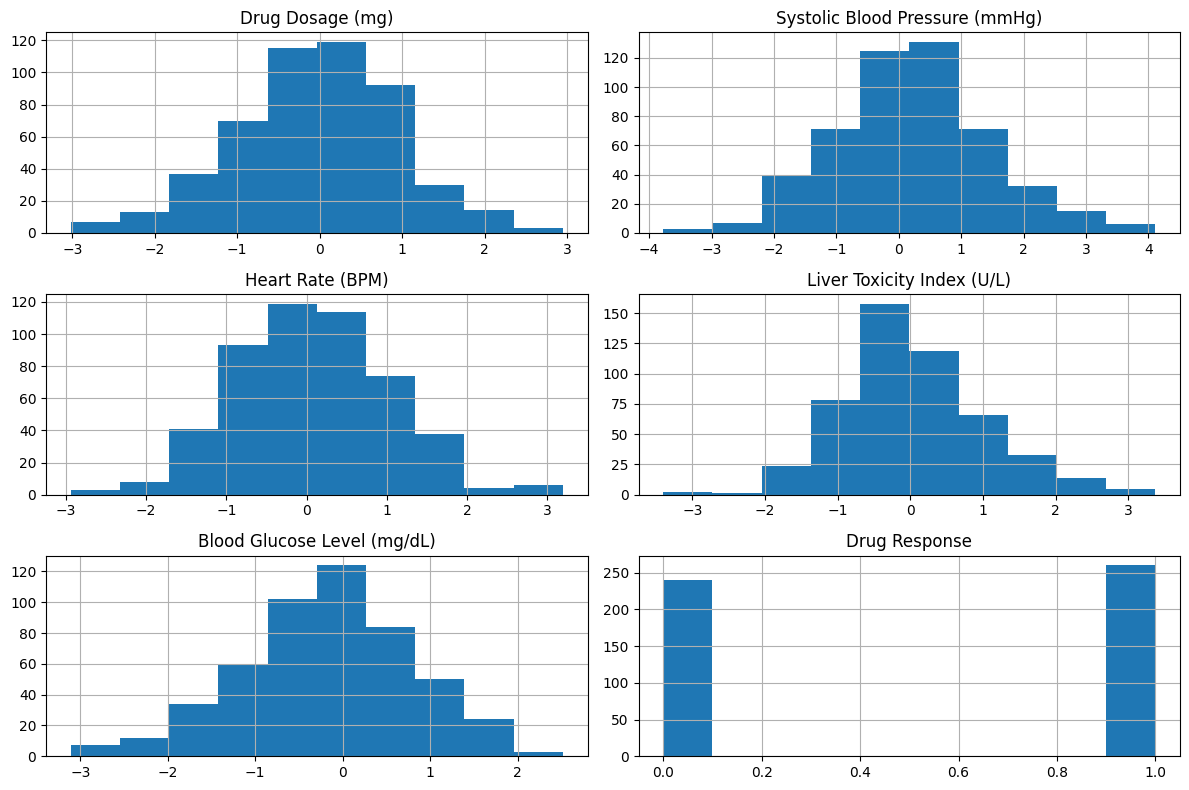

In [18]:
# Histogram
df.hist(figsize=(12,8))
plt.tight_layout()
plt.show()

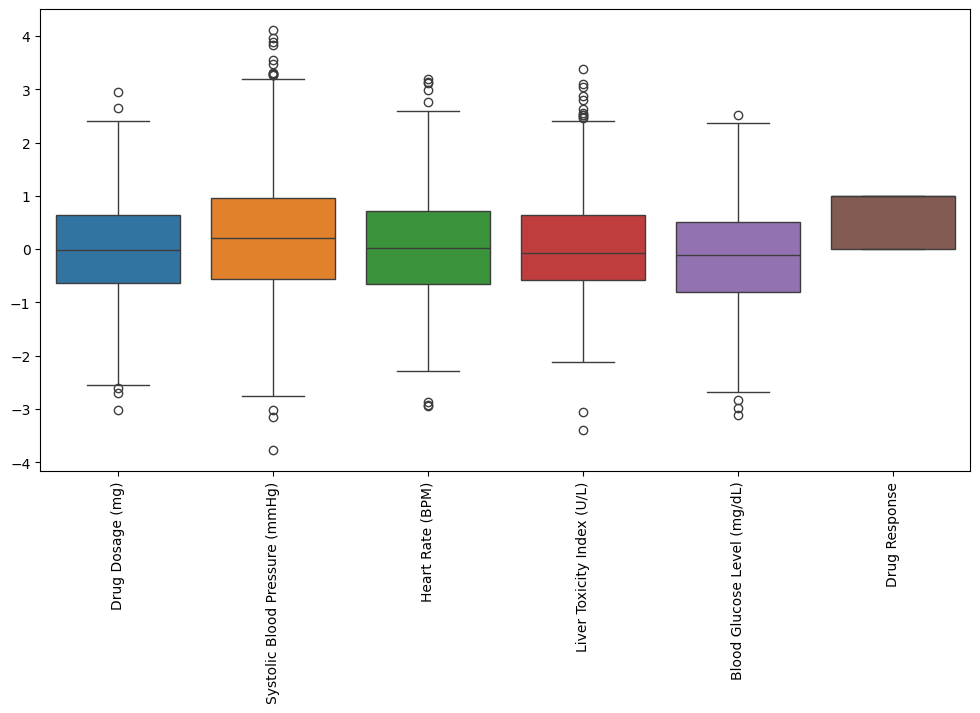

In [19]:
# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

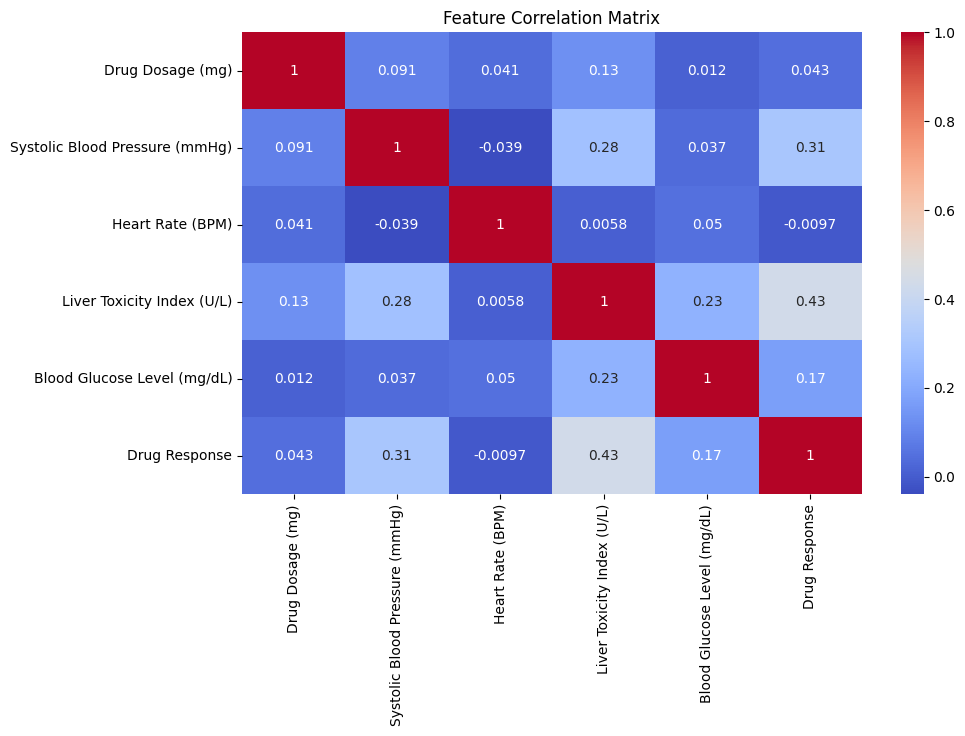

In [20]:
# Correlation Analysis
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Data Preprocessing

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# Replace spaces with underscores
df.columns = df.columns.str.replace(" ", "_", regex=False)

In [25]:
# Separate features and target
X = df.drop("Drug_Response", axis=1)
y = df["Drug_Response"]

In [26]:
# Encode categorical variables if present
X = pd.get_dummies(X, drop_first=True)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42, stratify=y )

In [28]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Visualization

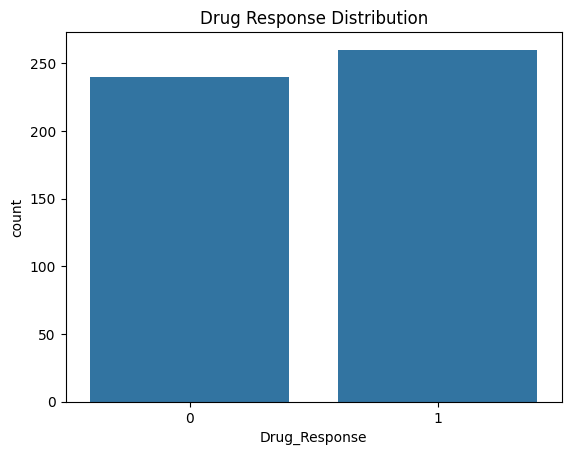

In [29]:
# Countplot
sns.countplot(x=y)
plt.title("Drug Response Distribution")
plt.show()

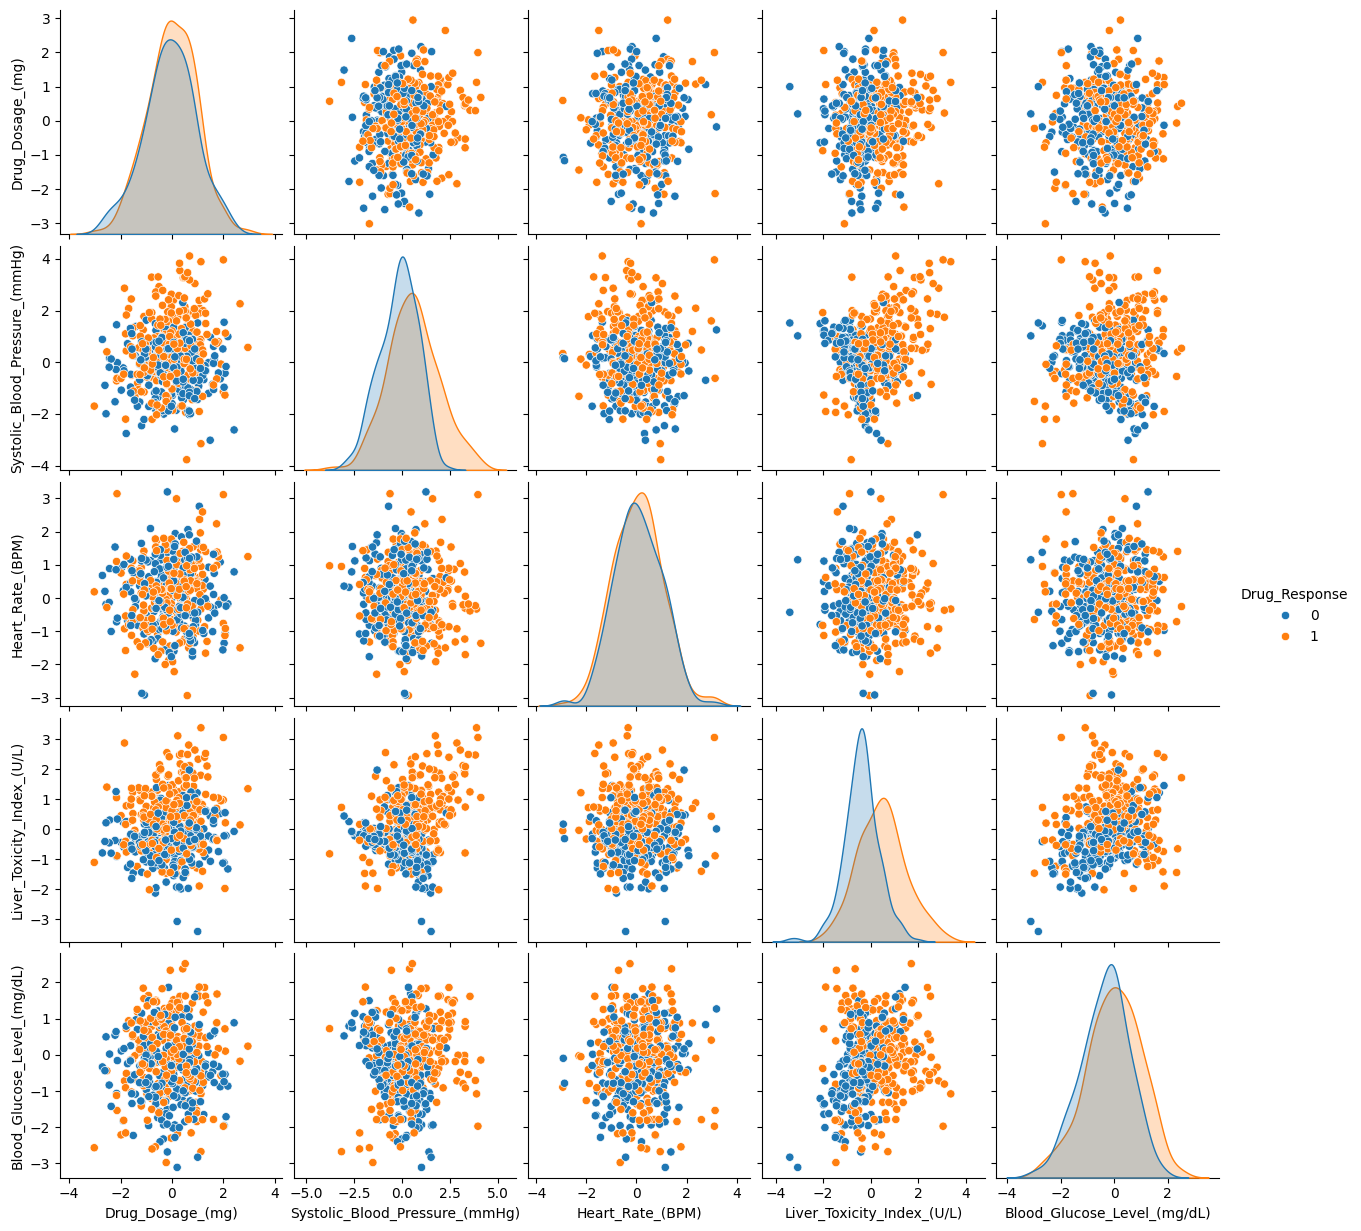

In [31]:
# Pair Plot
sns.pairplot(df, hue="Drug_Response")
plt.show()

# SVM Implementation

In [32]:
# Model Training and Evaluation
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
# Linear SVM
svm_linear = SVC(kernel="linear", random_state=42)
svm_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [34]:
# Predictions
y_pred = svm_linear.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.728
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        60
           1       0.77      0.68      0.72        65

    accuracy                           0.73       125
   macro avg       0.73      0.73      0.73       125
weighted avg       0.73      0.73      0.73       125

[[47 13]
 [21 44]]


# Visualization of SVM Results

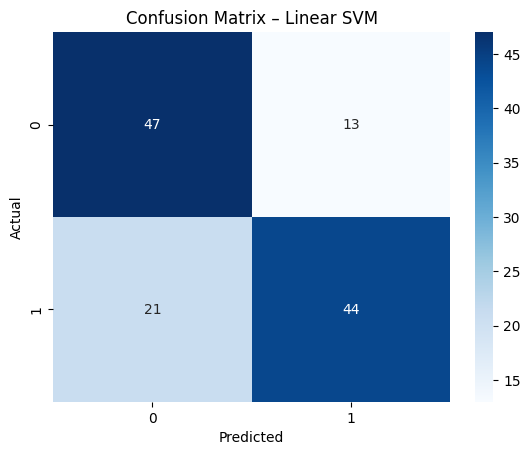

In [35]:
# Heatmap for confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Linear SVM")
plt.show()

# Parameter Tuning and Optimization

In [36]:
# Grid Search for Best Hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_svm = grid.best_estimator_


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [37]:
# Evaluation of Optimized Model
y_pred_best = best_svm.predict(X_test)

print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.752
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        60
           1       0.75      0.78      0.77        65

    accuracy                           0.75       125
   macro avg       0.75      0.75      0.75       125
weighted avg       0.75      0.75      0.75       125



# Comparison and Analysis

In [38]:
# Kernel Comparison
kernels = ["linear", "rbf", "poly"]

for k in kernels:
    model = SVC(kernel=k, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\nKernel: {k}")
    print("Accuracy:", accuracy_score(y_test, preds))


Kernel: linear
Accuracy: 0.728

Kernel: rbf
Accuracy: 0.752

Kernel: poly
Accuracy: 0.688


# Analysis & Interpretation

**Strengths of SVM**

Performs well in high-dimensional biomedical data.
Effective with small to medium datasets.
Robust decision boundaries.
Excellent for binary classification problems like drug response.

**Weaknesses**

Sensitive to feature scaling
Kernel selection can be computationally expensive
Limited interpretability compared to logistic regression

**Practical Implications**

Enables early-stage drug efficacy prediction.
Reduces failed clinical trials.
Supports precision medicine.
Can be integrated into clinical decision support systems.

# Final Conclusion
Support Vector Machines are a powerful and reliable approach for drug response classification. With proper preprocessing, visualization, and hyperparameter tuning, SVMs can significantly enhance decision-making in pharmaceutical research and personalized healthcare.